---
title: cheg304 homework 1 question 4
author: anon for grading??
date: today
format: 
    html:
        self-contained: true
---

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import factorial

(a)
loading in / plotting up (dropping in??) the histogram

average inclusions: 1.02


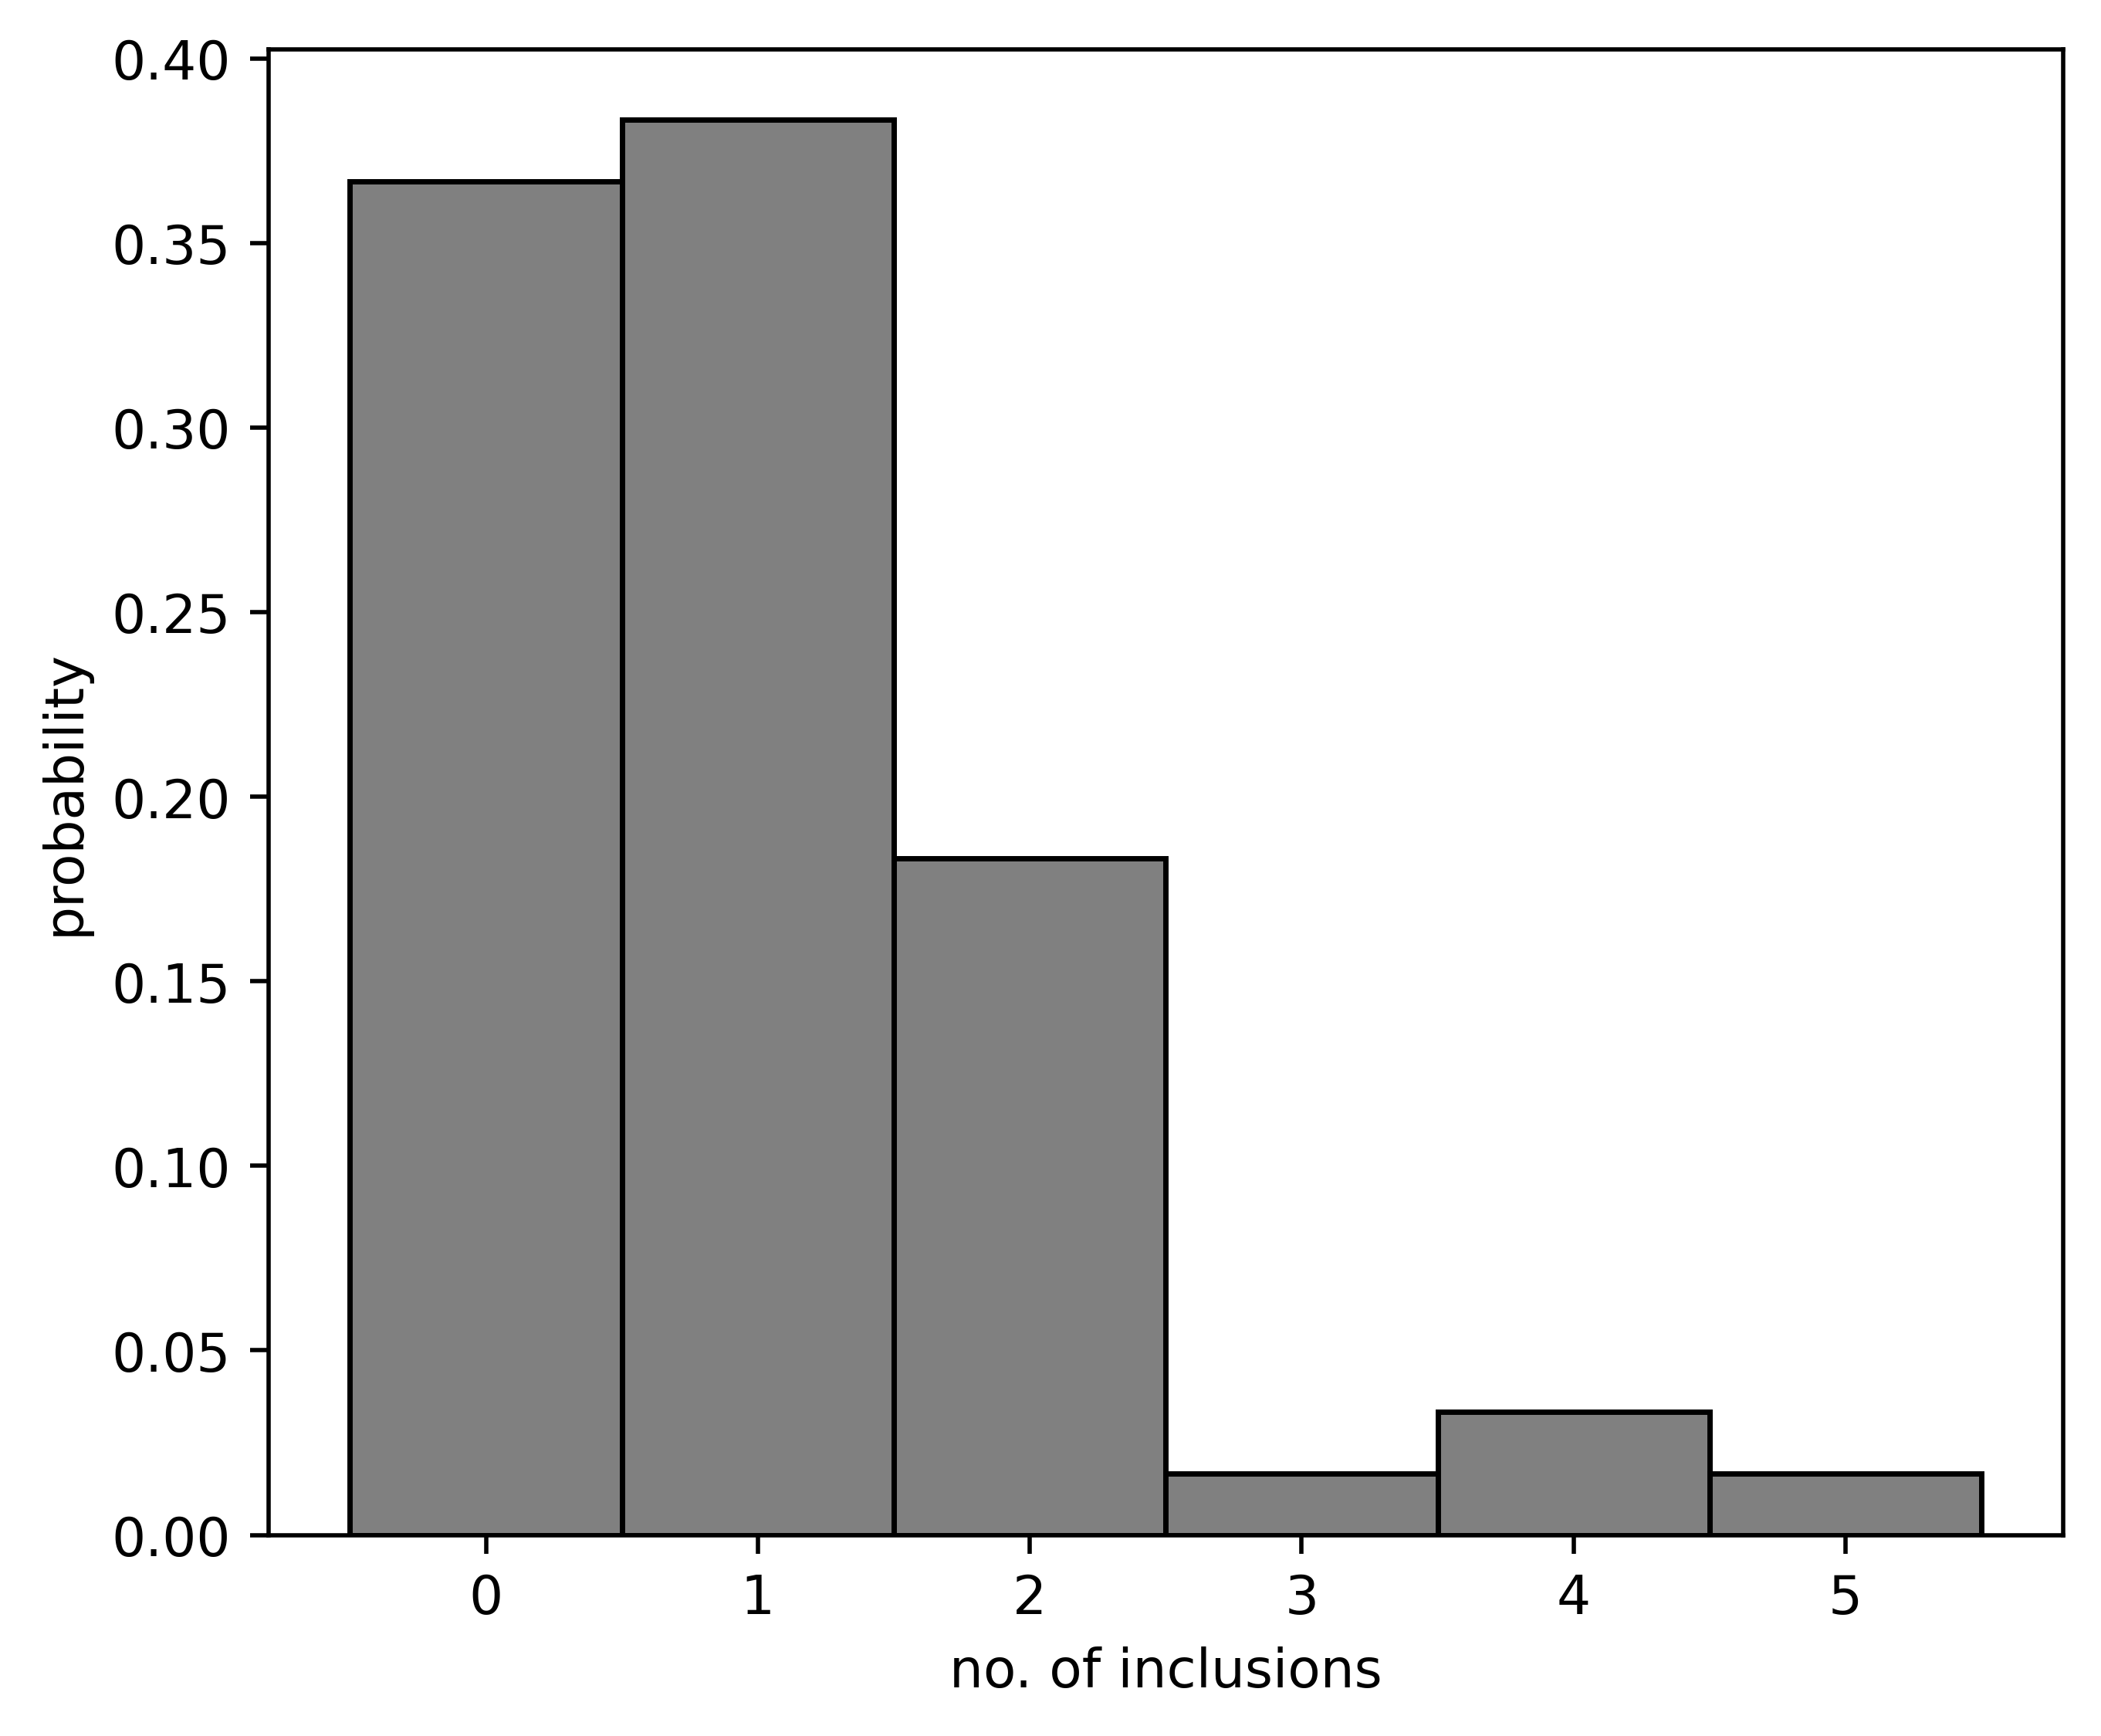

In [12]:
data = pd.read_excel('Chapter1.xlsx', sheet_name='Table1.2')
data = data['Inclusions']
average_inc = data.mean()
print(f'average inclusions: {average_inc:.2f}')

fig, ax = plt.subplots(figsize=(6,5), dpi=500, subplot_kw={'xlabel':'no. of inclusions', 'ylabel':'probability'})
ax.hist(data, bins=np.arange(-0.5,6.5),  facecolor='grey', edgecolor='black', density=True);

the best choice for $\mu$ would be the average. this comes from the knowledge that $\mu$ is average parameter for the normal distribution, and also visually the average is ~1 and the mode is 1 and it looks like perhaps a gaussian could be centered at ~1 and somewhat fit the positive data

(b)

recreating the figure and slapping on the gaussian...

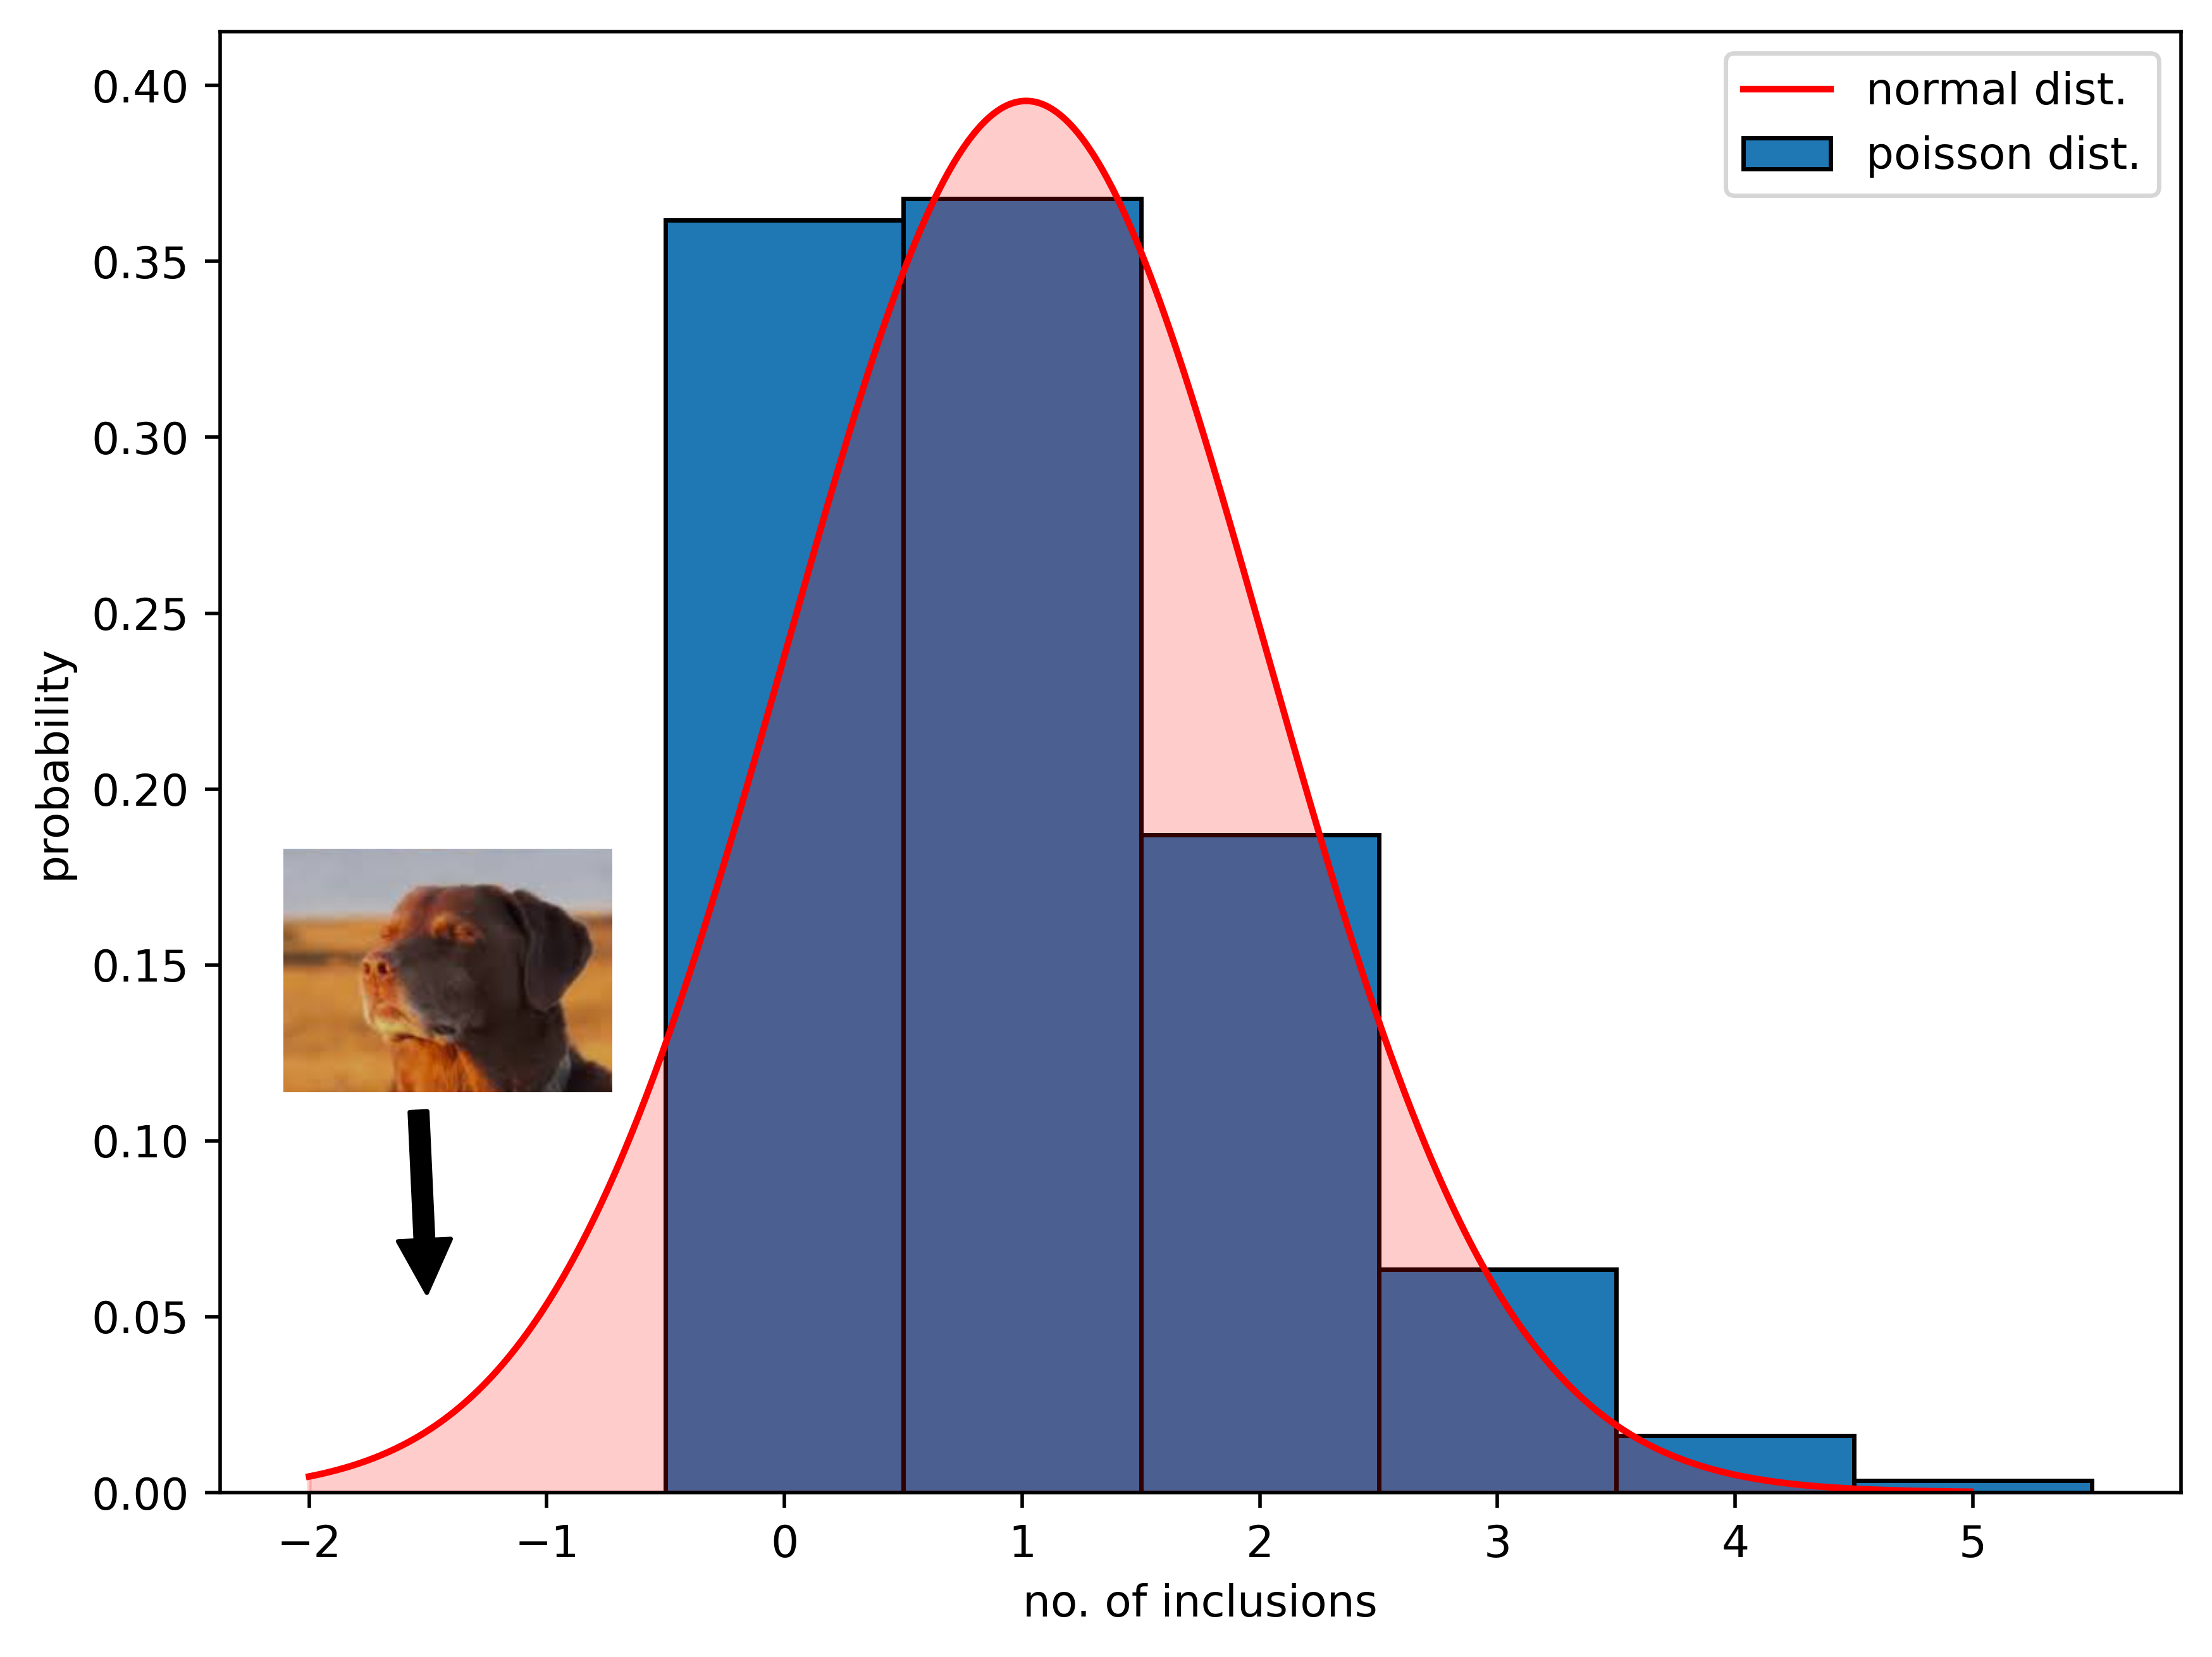

In [13]:
def poisson(n, lam):
    ''' poisson distribution where n is k and lam is lambda '''
    return (lam ** n) * np.exp(-lam) / factorial(n)

def normal(x, mu):
    sigma = np.sqrt(mu)
    return 1/(sigma * np.sqrt(2*np.pi)) * np.exp(-0.5 * ((x - mu)/sigma)**2)

x, xint = np.arange(-2,5, 0.01), np.arange(0,6)
y = normal(x, mu=average_inc) # use the average from the inclusions data as our mu
yint = poisson(xint, lam=average_inc)

fig, ax = plt.subplots(figsize=(8,6), dpi=500,  subplot_kw={'xlabel':'no. of inclusions', 'ylabel':'probability'})

ax.bar(xint, yint, width=1, edgecolor='black', label='poisson dist.')
ax.plot(x,y, color='red', label='normal dist.')
ax.fill_between(x,y, color='red', alpha=0.2)
ax.legend()

ax.annotate('perfect fit', xy=(-1.5, 0.05), xytext=(-2, 0.12), arrowprops=dict(facecolor='black', shrink=0.1))
inset_ax = fig.add_axes([0.15, 0.32, 0.13, 0.13])
inset_ax.imshow(plt.imread('dog.png'))
inset_ax.axis('off');